<a href="https://colab.research.google.com/github/jpantojaj/Credit_Scoring_Specialization/blob/main/Sesi%C3%B3n_13_14_LGD_EAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar Datos

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
loan_data_defaults = pd.read_csv('loan_data_defaults.csv')

# Exploramos los datos

In [ ]:
loan_data_defaults.columns.values

array(['Unnamed: 0', 'grade:A', 'grade:B', 'grade:C', 'grade:D',
       'grade:E', 'grade:F', 'grade:G', 'home_ownership:MORTGAGE',
       'home_ownership:NONE', 'home_ownership:OTHER',
       'home_ownership:OWN', 'home_ownership:RENT',
       'verification_status:Not Verified',
       'verification_status:Source Verified',
       'verification_status:Verified', 'purpose:car',
       'purpose:credit_card', 'purpose:debt_consolidation',
       'purpose:educational', 'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:f', 'initial_list_status:w', 'term_int',
       'emp_length_int', 'mths_since_issue_d',
       'mths_since_earliest_cr_line', 'funded_amnt', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',


In [ ]:
loan_data_defaults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43236 entries, 0 to 43235
Data columns (total 52 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           43236 non-null  int64  
 1   grade:A                              43236 non-null  int64  
 2   grade:B                              43236 non-null  int64  
 3   grade:C                              43236 non-null  int64  
 4   grade:D                              43236 non-null  int64  
 5   grade:E                              43236 non-null  int64  
 6   grade:F                              43236 non-null  int64  
 7   grade:G                              43236 non-null  int64  
 8   home_ownership:MORTGAGE              43236 non-null  int64  
 9   home_ownership:NONE                  43236 non-null  int64  
 10  home_ownership:OTHER                 43236 non-null  int64  
 11  home_ownership:OWN          

In [ ]:
loan_data_defaults.head()

,Unnamed: 0,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:NONE,...,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim,recovery_rate,CCF
0,1,0,0,1,0,0,0,0,0,0,...,5,164,0,3,0,4,0,2500,0.046832,0.817416
1,8,0,0,0,0,0,1,0,0,0,...,2,164,0,11,0,13,0,5600,0.033761,0.971068
2,9,0,1,0,0,0,0,0,0,0,...,0,164,0,2,0,3,0,5375,0.050100,0.874701
3,12,0,0,1,0,0,0,0,0,0,...,1,164,0,4,0,9,0,9000,0.049367,0.860429
4,14,0,1,0,0,0,0,0,0,0,...,2,164,0,14,0,29,0,10000,0.064510,0.456653


In [ ]:
loan_data_defaults.shape

(43236, 52)

In [ ]:
#pd.options.display.max_rows = None

In [ ]:
loan_data_defaults.isnull().sum()

Unnamed: 0                             0
grade:A                                0
grade:B                                0
grade:C                                0
grade:D                                0
grade:E                                0
grade:F                                0
grade:G                                0
home_ownership:MORTGAGE                0
home_ownership:NONE                    0
home_ownership:OTHER                   0
home_ownership:OWN                     0
home_ownership:RENT                    0
verification_status:Not Verified       0
verification_status:Source Verified    0
verification_status:Verified           0
purpose:car                            0
purpose:credit_card                    0
purpose:debt_consolidation             0
purpose:educational                    0
purpose:home_improvement               0
purpose:house                          0
purpose:major_purchase                 0
purpose:medical                        0
purpose:moving  

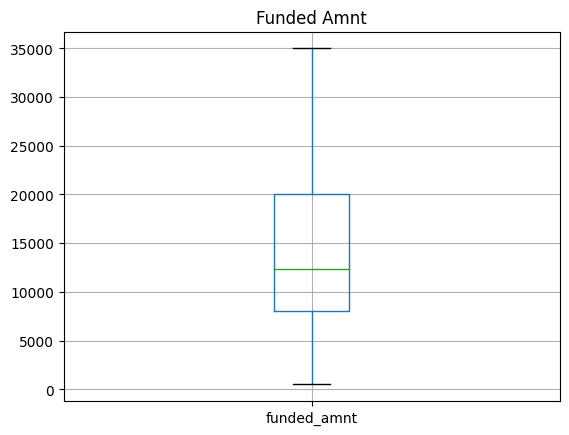

In [ ]:
# Gráfico de Cajas
import matplotlib.pyplot as plt
loan_data_defaults.boxplot(column = ['funded_amnt'])
plt.title('Funded Amnt')
plt.suptitle('')
plt.show()

In [ ]:
loan_data_defaults['grade:A'].value_counts()

0    40701
1     2535
Name: grade:A, dtype: int64

# Recovery Rate

In [ ]:
loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060820
std          0.089770
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.220774
Name: recovery_rate, dtype: float64

In [ ]:
#Topea el recovery rate
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])

In [ ]:
loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060770
std          0.089202
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.000000
Name: recovery_rate, dtype: float64

# Exploramos las variables

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

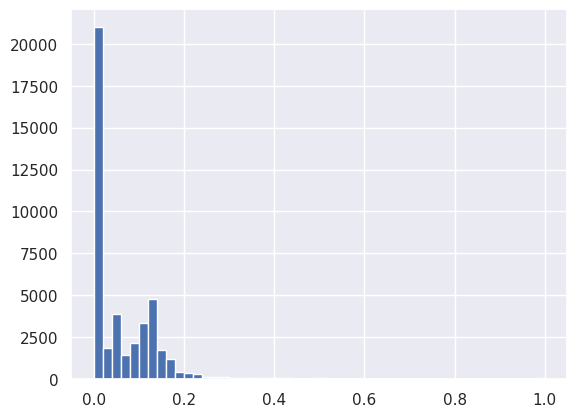

In [ ]:
#Ploteamos el recovery rate
plt.hist(loan_data_defaults['recovery_rate'], bins = 50)
plt.show()

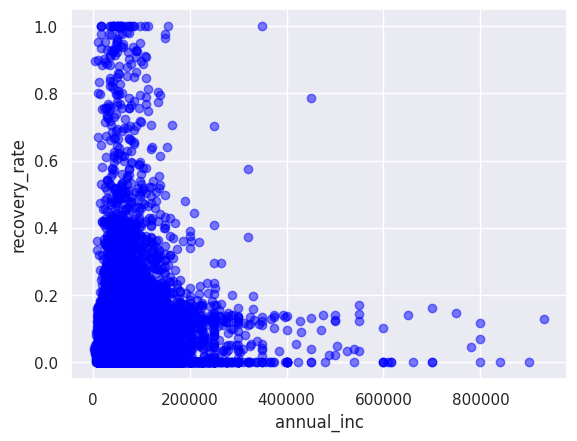

In [ ]:
# Plotea variables
plt.scatter(loan_data_defaults['annual_inc'], loan_data_defaults['recovery_rate'],c='blue', alpha=0.5)
plt.xlabel('annual_inc')
plt.ylabel('recovery_rate')
plt.show()

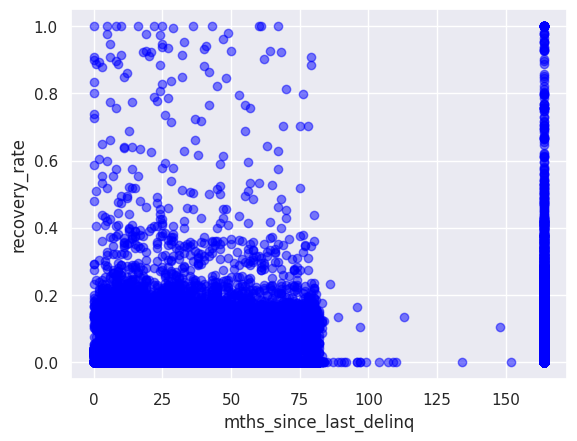

In [ ]:
# Plotea variables
plt.scatter(loan_data_defaults['mths_since_last_delinq'], loan_data_defaults['recovery_rate'],c='blue', alpha=0.5)
plt.xlabel('mths_since_last_delinq')
plt.ylabel('recovery_rate')
plt.show()

In [ ]:
loan_data_defaults.groupby('grade:A', as_index = False)['recovery_rate'].mean()

,grade:A,recovery_rate
0,0,0.061673
1,1,0.046267


In [ ]:
#Dada la alta concentración de recovery rate en 0, vamos a crear una nueva variable
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)

In [ ]:
loan_data_defaults['recovery_rate_0_1'].value_counts()

1    24371
0    18865
Name: recovery_rate_0_1, dtype: int64

## Generamos un Modelo de LGD: Dividimos la generación del modelo en 2 etapas

### Dividimos la data

In [ ]:
from sklearn.model_selection import train_test_split
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test = train_test_split(loan_data_defaults.drop(['recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['recovery_rate_0_1'], test_size = 0.2, random_state = 123)

### Preparing the Inputs

In [ ]:
features_all = ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']

In [ ]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]

### Estimamos el Modelo

In [ ]:
#Estimamos el modelo logístico
from sklearn.linear_model import LogisticRegression
reg_lgd_st_1 = LogisticRegression()
reg_lgd_st_1.fit(lgd_inputs_stage_1_train, lgd_targets_stage_1_train)

LogisticRegression()

In [ ]:
feature_name = lgd_inputs_stage_1_train.columns.values
feature_name

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'home_ownership:RENT', 'verification_status:Not Verified',
       'verification_status:Source Verified',
       'verification_status:Verified', 'purpose:car',
       'purpose:credit_card', 'purpose:debt_consolidation',
       'purpose:educational', 'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:f', 'initial_list_status:w', 'term_int',
       'emp_length_int', 'mths_since_issue_d',
       'mths_since_earliest_cr_line', 'funded_amnt', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_la

In [ ]:
print(reg_lgd_st_1.intercept_)
print(reg_lgd_st_1.coef_)

[-1.78779432e-05]
[[-4.64327209e-06 -4.29565920e-05 -6.81894275e-05  1.09861807e-05
   2.48192883e-05  5.45891465e-05  7.51673221e-06 -4.05192256e-05
   8.43632330e-07  2.94335470e-07  1.21993474e-05  9.30396649e-06
  -3.07651256e-06 -1.24391676e-04  1.09590245e-04  1.14429718e-05
  -7.88540523e-05 -8.48077583e-05  2.00842814e-06  1.11715615e-05
   9.05643651e-06  1.43491853e-05  2.64334019e-06  3.69634902e-06
   3.34478285e-05  2.90965019e-06  4.17105691e-05  1.38870919e-06
   1.19588372e-05  5.44279238e-04 -5.62157182e-04  7.17005032e-04
  -2.63634521e-04  1.71520363e-02 -1.57819526e-03  7.08449706e-06
   8.32352368e-04 -7.62854025e-05  6.24367437e-07 -3.36797847e-03
  -4.26493400e-05  1.75340517e-04 -1.03707325e-03 -6.08456095e-03
  -1.05487317e-03 -9.40563881e-05 -3.52486647e-03  3.17719143e-06
  -6.05654482e-06]]


In [ ]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.787794e-05
1,grade:A,-4.643272e-06
2,grade:B,-4.295659e-05
3,grade:C,-6.818943e-05
4,grade:D,1.098618e-05
5,grade:E,2.481929e-05
6,grade:F,5.458915e-05
7,grade:G,7.516732e-06
8,home_ownership:MORTGAGE,-4.051923e-05
9,home_ownership:NONE,8.436323e-07


### Revisamos el performance del modelo (TEST)

In [ ]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]
lgd_inputs_stage_1_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,...,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim
31437,0,0,0,1,0,0,0,1,0,0,...,24.97,0,0,24,0,31,0,42,0,41200
2484,0,0,1,0,0,0,0,1,0,0,...,7.82,2,0,13,0,13,0,34,0,7500
1702,0,0,0,1,0,0,0,0,0,0,...,9.01,0,0,164,0,7,0,13,0,12000
42971,0,0,0,1,0,0,0,1,0,0,...,24.84,0,0,41,0,27,0,63,0,32900
13187,0,1,0,0,0,0,0,0,0,0,...,17.65,0,0,33,0,7,0,32,0,17200


In [ ]:
lgd_inputs_stage_1_test.shape

(8648, 49)

In [ ]:
y_hat_test_lgd_stage_1 = reg_lgd_st_1.predict(lgd_inputs_stage_1_test)
y_hat_test_lgd_stage_1

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.predict_proba(lgd_inputs_stage_1_test)
y_hat_test_proba_lgd_stage_1

array([[0.51824675, 0.48175325],
       [0.28080624, 0.71919376],
       [0.3014964 , 0.6985036 ],
       ...,
       [0.33550583, 0.66449417],
       [0.60360904, 0.39639096],
       [0.4175343 , 0.5824657 ]])

In [ ]:
y_hat_test_proba_lgd_stage_1 = y_hat_test_proba_lgd_stage_1[: ][: , 1]
y_hat_test_proba_lgd_stage_1

array([0.48175325, 0.71919376, 0.6985036 , ..., 0.66449417, 0.39639096,
       0.5824657 ])

In [ ]:
lgd_targets_stage_1_test.shape

(8648,)

In [ ]:
preds_lr_df = pd.DataFrame(y_hat_test_proba_lgd_stage_1, columns = ['y_hat_test_proba_lgd_stage_1'])
preds_lr_df.head()

,y_hat_test_proba_lgd_stage_1
0,0.481753
1,0.719194
2,0.698504
3,0.495901
4,0.581945


In [ ]:
df_actual_predicted_probs = pd.concat([lgd_targets_stage_1_test.reset_index(drop = True).rename('lgd_targets_stage_1_test'), preds_lr_df], axis = 1)
df_actual_predicted_probs.head()

,lgd_targets_stage_1_test,y_hat_test_proba_lgd_stage_1
0,0,0.481753
1,0,0.719194
2,1,0.698504
3,0,0.495901
4,0,0.581945


### Evaluamos la Precisión del Modelo

In [ ]:
tr = 0.5
df_actual_predicted_probs['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'] > tr, 1, 0)

In [ ]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,1115,2648
1,757,4128


In [ ]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.128932,0.306198
1,0.087535,0.477336


In [ ]:
(pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.6062673450508789

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])

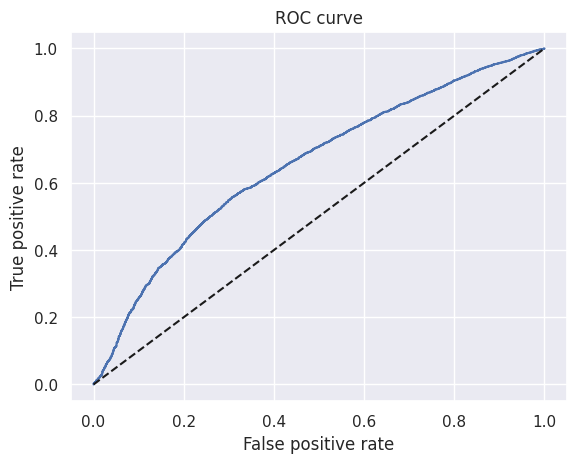

In [ ]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [ ]:
AUC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
AUC

0.6553085026837022

In [ ]:
gini=2*AUC-1
gini

0.31061700536740444

### Stage 2: Regresión Lineal sobre los valores >0

In [ ]:
lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]

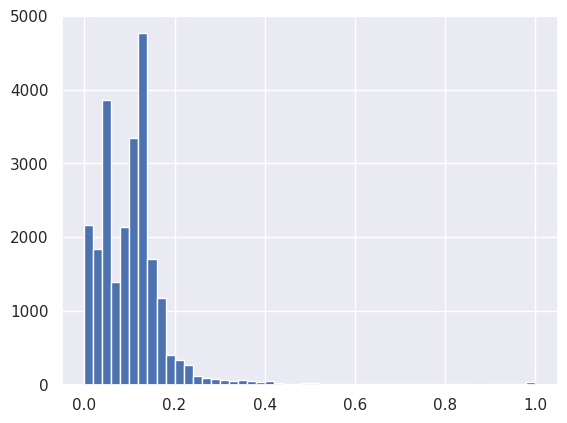

In [ ]:
#Ploteamos el recovery rate
plt.hist(lgd_stage_2_data['recovery_rate'], bins = 50)
plt.show()

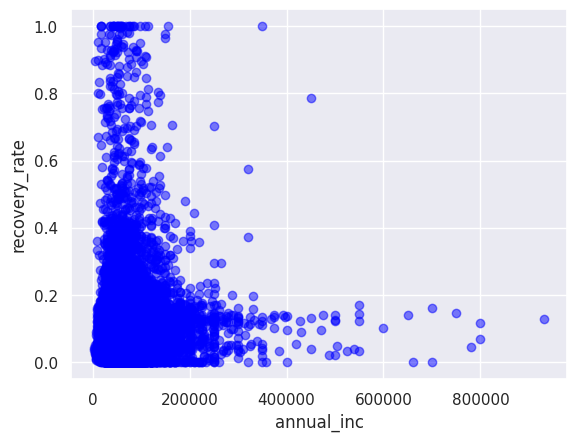

In [ ]:
# Plotea variables
plt.scatter(lgd_stage_2_data['annual_inc'], lgd_stage_2_data['recovery_rate'],c='blue', alpha=0.5)
plt.xlabel('annual_inc')
plt.ylabel('recovery_rate')
plt.show()

In [ ]:
# Dividimos los datos
lgd_inputs_stage_2_train, lgd_inputs_stage_2_test, lgd_targets_stage_2_train, lgd_targets_stage_2_test = train_test_split(lgd_stage_2_data.drop(['recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), lgd_stage_2_data['recovery_rate'], test_size = 0.2, random_state = 123)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train[features_all]

In [ ]:
reg_lgd_st_2 = LinearRegression()
reg_lgd_st_2.fit(lgd_inputs_stage_2_train, lgd_targets_stage_2_train)

LinearRegression()

In [ ]:
print(reg_lgd_st_2.intercept_)
print(reg_lgd_st_2.coef_)

7058118.9268018855
[-7.05811869e+06 -7.05811868e+06 -7.05811866e+06 -7.05811865e+06
 -7.05811864e+06 -7.05811863e+06 -7.05811862e+06 -3.61447797e-02
  9.12247491e-02  1.91342708e-02 -3.66250187e-02 -3.75887179e-02
  1.67119050e-03 -2.12288699e-03  4.51811811e-04 -1.07815219e-02
 -8.94255561e-03 -8.70968098e-03  6.41802761e-02 -1.08542388e-02
 -9.15883516e-03 -3.43585389e-03  6.93574101e-04 -5.09392462e-03
 -5.87906701e-03 -2.40863910e-03 -5.07511984e-03 -8.11243771e-03
  1.35780453e-02 -6.56665629e-03  6.56665961e-03  3.18601150e-04
  3.92010249e-04 -1.58283469e-03  2.22376036e-05 -1.48892095e-07
 -2.66833537e-03 -1.24911869e-05  6.17344690e-08  1.41814063e-04
  9.90859305e-04  1.40519625e-03 -1.79298520e-05 -3.23874135e-05
 -1.17296131e-03  1.75436238e-03  4.89585576e-04 -2.86812355e-03
  2.40684581e-07]


In [ ]:
feature_name = lgd_inputs_stage_2_train.columns.values
feature_name

array(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'grade:G', 'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'home_ownership:RENT', 'verification_status:Not Verified',
       'verification_status:Source Verified',
       'verification_status:Verified', 'purpose:car',
       'purpose:credit_card', 'purpose:debt_consolidation',
       'purpose:educational', 'purpose:home_improvement', 'purpose:house',
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy',
       'purpose:small_business', 'purpose:vacation', 'purpose:wedding',
       'initial_list_status:f', 'initial_list_status:w', 'term_int',
       'emp_length_int', 'mths_since_issue_d',
       'mths_since_earliest_cr_line', 'funded_amnt', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_la

In [ ]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,7.058119e+06
1,grade:A,-7.058119e+06
2,grade:B,-7.058119e+06
3,grade:C,-7.058119e+06
4,grade:D,-7.058119e+06
5,grade:E,-7.058119e+06
6,grade:F,-7.058119e+06
7,grade:G,-7.058119e+06
8,home_ownership:MORTGAGE,-3.614478e-02
9,home_ownership:NONE,9.122475e-02


### Stage 2 – Evaluación del Modelo

In [ ]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test[features_all]
lgd_inputs_stage_2_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,...,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim
11351,0,0,0,1,0,0,0,0,0,0,...,12.21,0,0,164,0,8,0,18,0,23200
24982,0,1,0,0,0,0,0,0,0,0,...,9.20,0,1,164,0,8,0,10,0,7125
34330,0,1,0,0,0,0,0,0,0,0,...,9.89,0,0,164,56,10,1,36,0,15100
8537,0,1,0,0,0,0,0,1,0,0,...,9.97,1,0,14,99,8,1,25,0,7000
35115,0,1,0,0,0,0,0,0,0,0,...,15.14,0,2,24,0,17,0,49,0,16500


In [ ]:
lgd_inputs_stage_2_test.shape

(4875, 49)

In [ ]:
y_hat_test_lgd_stage_2 = reg_lgd_st_2.predict(lgd_inputs_stage_2_test)
y_hat_test_lgd_stage_2

array([0.10530684, 0.08195185, 0.12653942, ..., 0.10009554, 0.06829643,
       0.09969694])

In [ ]:
y_hat_test_lgd_stage_2.shape

(4875,)

In [ ]:
pred_linreg_stg2=pd.DataFrame(y_hat_test_lgd_stage_2,columns=['recovery_rate_pred'])

In [ ]:
pred_linreg_stg2.head()

,recovery_rate_pred
0,0.105307
1,0.081952
2,0.126539
3,0.138008
4,0.134412


In [ ]:
df_pred_stg2=pd.concat([lgd_targets_stage_2_test.reset_index(drop = True), pred_linreg_stg2], axis = 1)
df_pred_stg2.head()

,recovery_rate,recovery_rate_pred
0,0.129592,0.105307
1,0.045055,0.081952
2,0.126236,0.126539
3,0.107608,0.138008
4,0.148448,0.134412


In [ ]:
df_pred_stg2.corr()

,recovery_rate,recovery_rate_pred
recovery_rate,1.000000,0.272962
recovery_rate_pred,0.272962,1.000000


In [ ]:
reg_lgd_st_2.score(lgd_inputs_stage_2_test,lgd_targets_stage_2_test)

0.07368122023152213

In [ ]:
np.sqrt(mean_squared_error(lgd_targets_stage_2_test,y_hat_test_lgd_stage_2))

0.09340840117032424

<Axes: xlabel='recovery_rate', ylabel='Density'>

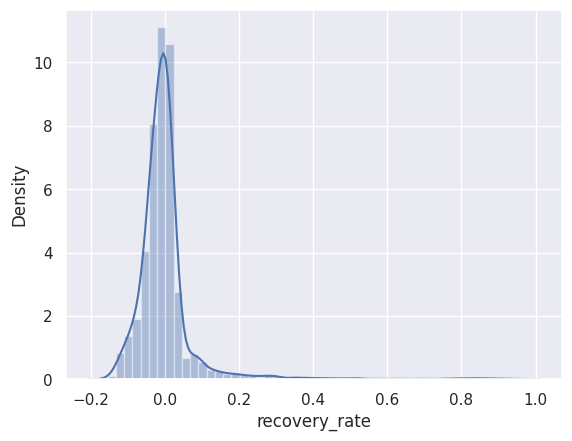

In [ ]:
sns.distplot(lgd_targets_stage_2_test - y_hat_test_lgd_stage_2)

In [ ]:
pd.DataFrame(y_hat_test_lgd_stage_2).describe()

,0
count,4875.000000
mean,0.107816
std,0.029256
min,-0.023372
25%,0.089269
50%,0.109633
75%,0.127546
max,0.262350


In [ ]:
y_hat_test_lgd_stage_2 = np.where(y_hat_test_lgd_stage_2 < 0, 0, y_hat_test_lgd_stage_2)
y_hat_test_lgd_stage_2 = np.where(y_hat_test_lgd_stage_2 > 1, 1, y_hat_test_lgd_stage_2)

In [ ]:
pd.DataFrame(y_hat_test_lgd_stage_2).describe()

,0
count,4875.000000
mean,0.107822
std,0.029229
min,0.000000
25%,0.089269
50%,0.109633
75%,0.127546
max,0.262350


### Combinamos el Stage 1 y 2: predecir si es =0 o mayor a 0, y para los mayores a 0 cuál es su recuperación

In [ ]:
y_hat_test_lgd_stage_2_all = reg_lgd_st_2.predict(lgd_inputs_stage_1_test)
y_hat_test_lgd_stage_2_all

array([0.15352582, 0.08268424, 0.08202276, ..., 0.08280233, 0.12914252,
       0.14815862])

In [ ]:
y_hat_test_lgd = y_hat_test_lgd_stage_1 * y_hat_test_lgd_stage_2_all

In [ ]:
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,8648.000000
mean,0.084818
std,0.051719
min,-0.008949
25%,0.052261
50%,0.100135
75%,0.123838
max,0.187025


In [ ]:
y_hat_test_lgd = np.where(y_hat_test_lgd < 0, 0, y_hat_test_lgd)
y_hat_test_lgd = np.where(y_hat_test_lgd > 1, 1, y_hat_test_lgd)

In [ ]:
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,8648.000000
mean,0.084819
std,0.051716
min,0.000000
25%,0.052261
50%,0.100135
75%,0.123838
max,0.187025


# Modelo para estimar EAD

In [ ]:
loan_data_defaults['CCF'].describe()

count    43236.000000
mean         0.735952
std          0.200742
min          0.000438
25%          0.632088
50%          0.789908
75%          0.888543
max          1.000000
Name: CCF, dtype: float64

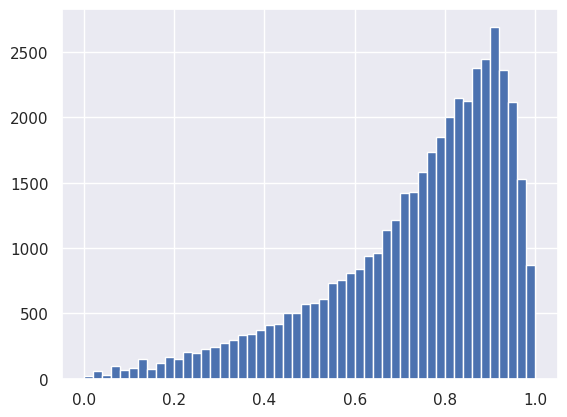

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.hist(loan_data_defaults['CCF'], bins = 50)
plt.show()

In [ ]:
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(loan_data_defaults.drop([ 'recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), loan_data_defaults['CCF'], test_size = 0.2, random_state = 123)

In [ ]:
ead_inputs_train = ead_inputs_train[features_all]
ead_inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,...,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim
7183,0,0,0,1,0,0,0,1,0,0,...,14.18,0,2,35,0,11,0,28,0,29700
16746,0,0,0,0,1,0,0,0,0,0,...,21.65,0,0,164,0,8,0,12,0,19400
5240,0,1,0,0,0,0,0,0,0,0,...,8.57,0,1,164,0,8,0,10,0,6500
310,0,0,0,0,0,1,0,0,0,0,...,17.57,2,1,15,0,3,0,26,0,15000
37980,1,0,0,0,0,0,0,1,0,0,...,23.55,0,1,68,0,23,0,47,0,66700


In [ ]:
reg_ead = LinearRegression()
reg_ead.fit(ead_inputs_train, ead_targets_train)

LinearRegression()

In [ ]:
print(reg_ead.intercept_)
print(reg_ead.coef_)

3658705.9275148227
[-3.65870509e+06 -3.65870502e+06 -3.65870496e+06 -3.65870490e+06
 -3.65870485e+06 -3.65870480e+06 -3.65870478e+06 -7.30411451e-03
  1.75715335e-02 -8.10753109e-03 -1.73097536e-03 -4.28649320e-04
 -4.98935118e-03  8.02377789e-03 -3.03432810e-03 -3.55150949e-02
 -3.21680102e-02 -2.19332116e-02  7.27878995e-02 -1.43562232e-02
 -1.75837549e-02 -5.78947535e-03  8.92844448e-03  1.35178354e-02
  1.47347172e-03  2.22266394e-02  1.82305753e-02 -1.23906098e-02
  2.57149691e-03 -6.84947754e-03  6.84947727e-03  4.48992929e-03
 -1.51995556e-03 -4.27746475e-03 -4.00406389e-05  2.37160281e-06
 -1.17895029e-02 -7.04933052e-05  2.82482707e-08  3.41935632e-04
  3.94642595e-03  1.13058781e-02  6.21594221e-05 -5.36130618e-05
 -2.03167129e-03  6.68482524e-03  4.99937184e-04  1.43075395e-02
  8.16872185e-08]


In [ ]:
feature_name = ead_inputs_train.columns.values

In [ ]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,3.658706e+06
1,grade:A,-3.658705e+06
2,grade:B,-3.658705e+06
3,grade:C,-3.658705e+06
4,grade:D,-3.658705e+06
5,grade:E,-3.658705e+06
6,grade:F,-3.658705e+06
7,grade:G,-3.658705e+06
8,home_ownership:MORTGAGE,-7.304115e-03
9,home_ownership:NONE,1.757153e-02


### Evaluamos el modelo

In [ ]:
ead_inputs_test = ead_inputs_test[features_all]

In [ ]:
ead_inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,...,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim
31437,0,0,0,1,0,0,0,1,0,0,...,24.97,0,0,24,0,31,0,42,0,41200
2484,0,0,1,0,0,0,0,1,0,0,...,7.82,2,0,13,0,13,0,34,0,7500
1702,0,0,0,1,0,0,0,0,0,0,...,9.01,0,0,164,0,7,0,13,0,12000
42971,0,0,0,1,0,0,0,1,0,0,...,24.84,0,0,41,0,27,0,63,0,32900
13187,0,1,0,0,0,0,0,0,0,0,...,17.65,0,0,33,0,7,0,32,0,17200


In [ ]:
ead_inputs_test.shape

(8648, 49)

In [ ]:
y_hat_test_ead = reg_ead.predict(ead_inputs_test)
y_hat_test_ead

array([0.76905424, 0.61601164, 0.7222026 , ..., 0.65320197, 0.72819546,
       0.95817426])

In [ ]:
y_hat_test_ead.shape

(8648,)

In [ ]:
pred_ead=pd.DataFrame(y_hat_test_ead,columns=['y_hat_test_ead'])
pred_ead.head()

,y_hat_test_ead
0,0.769054
1,0.616012
2,0.722203
3,0.838811
4,0.679734


In [ ]:
df_ead=pd.concat([ead_targets_test.reset_index(drop = True), pred_ead], axis = 1)
df_ead.head()

,CCF,y_hat_test_ead
0,0.840169,0.769054
1,0.785661,0.616012
2,0.852103,0.722203
3,0.798670,0.838811
4,0.597870,0.679734


<Axes: xlabel='CCF', ylabel='Density'>

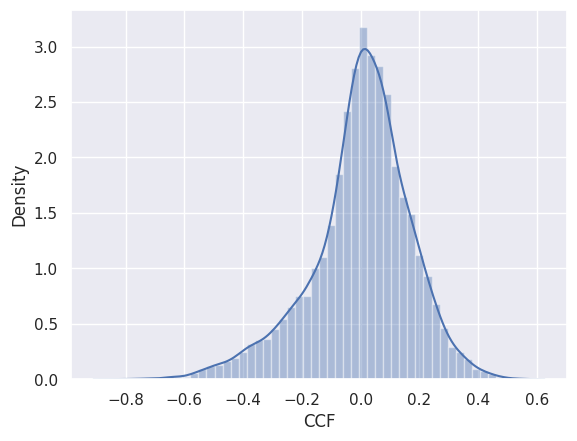

In [ ]:
sns.distplot(ead_targets_test - y_hat_test_ead)

In [ ]:
reg_ead.score(ead_inputs_test,ead_targets_test)

0.27423553857469907

In [ ]:
rmse_ead = np.sqrt(mean_squared_error(ead_targets_test,y_hat_test_ead))
rmse_ead

0.170777091860857

In [ ]:
pred_ead.describe()

,y_hat_test_ead
count,8648.000000
mean,0.736446
std,0.105724
min,0.360781
25%,0.662480
50%,0.731990
75%,0.812840
max,1.016772


In [ ]:
pred_ead['y_hat_test_ead'] = np.where(pred_ead['y_hat_test_ead'] < 0, 0, pred_ead['y_hat_test_ead'])
pred_ead['y_hat_test_ead'] = np.where(pred_ead['y_hat_test_ead'] > 1, 1, pred_ead['y_hat_test_ead'])

In [ ]:
pred_ead.describe()

,y_hat_test_ead
count,8648.000000
mean,0.736440
std,0.105710
min,0.360781
25%,0.662480
50%,0.731990
75%,0.812840
max,1.000000
